<h1 align='center'> Zomato Recommendation System</h1>

## Context
I was always fascinated by the food culture of Bengaluru. Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

In this notebook I will try analyzing the Buisness Problem of Zomato and create a practical recommendation system for users.

![Zomato](https://miro.medium.com/max/1400/1*cQ6bco2E8qHAUqrqKlKwCQ.jpeg)

### What is Recommendation System?
The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.
They are active information filtering systems which personalize the information coming to a user based on his interests, relevance of the information etc. Recommender systems are used widely for recommending movies, articles, restaurants, places to visit, items to buy etc.


There are basically three types of recommender systems:-

 - Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features.

 - Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations.

 - Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.
 
 
Here I will be using Content Based Filtering

Content-Based Filtering: This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.

This data set consists of restaurants of Bangalore,India collected from Zomato.

My aim is to create a content based recommender system in which when I will write a restaurant name, Recommender system will look at the reviews of other restaurants, and System will recommend us other restaurants with similar reviews and sort them from the highest rated.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations
3. **Text Preprocessing**
 - Cleaning unnecessary words in the reviews
 - Removing links and other unncessary items
 - Removing Symbols
4. **Recommendation System**

### Importing Libraries

In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading the dataset

In [4]:
#reading the dataset
zomato_real=pd.read_csv("/content/drive/MyDrive/Banglore.csv")
zomato_real.head() # prints the first N rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning and Feature Engineering

In [6]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','phone'],axis=1) #Dropping the column "phone", "url" and saving the new dataset as "zomato"

In [7]:
#After removing the extra columns
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  reviews_list                 51717 non-null  object
 12  menu_item                    51717 non-null  object
 13  listed_in(type)              51

In [8]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [9]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23395 non-null  object
 1   name                         23395 non-null  object
 2   online_order                 23395 non-null  object
 3   book_table                   23395 non-null  object
 4   rate                         23395 non-null  object
 5   votes                        23395 non-null  int64 
 6   location                     23395 non-null  object
 7   rest_type                    23395 non-null  object
 8   dish_liked                   23395 non-null  object
 9   cuisines                     23395 non-null  object
 10  approx_cost(for two people)  23395 non-null  object
 11  reviews_list                 23395 non-null  object
 12  menu_item                    23395 non-null  object
 13  listed_in(type)              23

In [10]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [12]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23395 non-null  object 
 1   name          23395 non-null  object 
 2   online_order  23395 non-null  object 
 3   book_table    23395 non-null  object 
 4   rate          23395 non-null  object 
 5   votes         23395 non-null  int64  
 6   location      23395 non-null  object 
 7   rest_type     23395 non-null  object 
 8   dish_liked    23395 non-null  object 
 9   cuisines      23395 non-null  object 
 10  cost          23395 non-null  float64
 11  reviews_list  23395 non-null  object 
 12  menu_item     23395 non-null  object 
 13  type          23395 non-null  object 
 14  city          23395 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.9+ MB


In [13]:
#Reading Rate of dataset
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#We remove the restaurent datas which has rate='NEW'
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Now we see that 'rate' column has converted to float datatype


Now we will Label Encode the input variable columns into 0,1,2...



In [15]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [16]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['cost'] = zomato_en['cost'].fillna(zomato_en['cost'].mean())

In [17]:
zomato_en.isna().sum()


address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [18]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

**The highest correlation is between name and address which is 0.63 which is not of very much concern**

**Splitting dataset into train & test**

In [19]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head(10)


,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,reviews_list
3198,0,1,518,49,0,1721,5,2380
21046,0,0,57,78,0,3298,1487,10756
12414,1,1,105,54,10,2482,161,3588
5541,0,0,2229,27,52,1191,616,3978
1891,1,1,59,17,0,979,507,1339
15370,0,1,115,11,2,2001,862,9360
10863,0,1,140,66,4,3481,1356,6579
15919,0,1,54,23,2,2018,101,2808
4539,0,1,221,11,21,391,251,452
7256,0,1,205,20,24,2830,1188,4677


In [21]:
y_train.head()


3198     4.9
21046    3.7
12414    3.9
5541     4.4
1891     3.2
Name: rate, dtype: float64

In [22]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

In [23]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [24]:
zomato['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

**As you see 'Location' columns has more sublocations
and 'city' columns have a better Locations so we drop 'Location' column**

In [25]:
del zomato['location']
zomato.head()

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [26]:
zomato.head()

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
## Checking Null values
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

# Data Visualization


*Checking for correlation among all the x(inputs)*


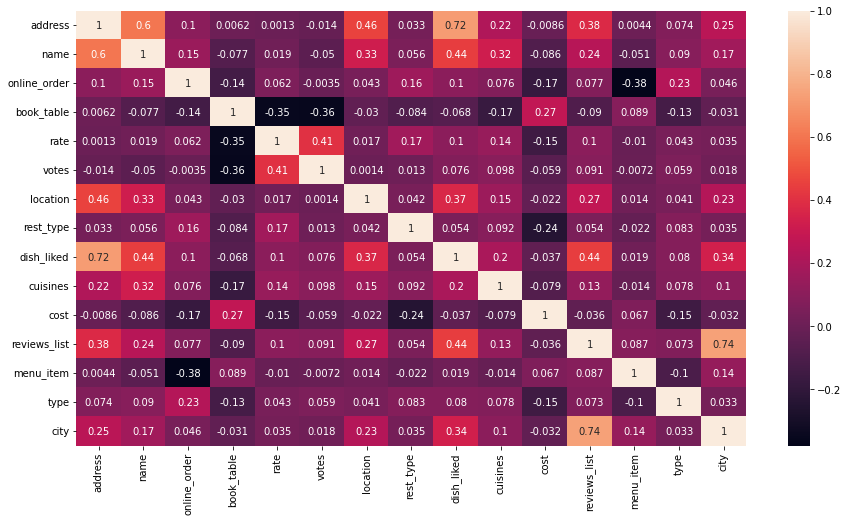

In [28]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

i) No. of restaurants in a particular location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

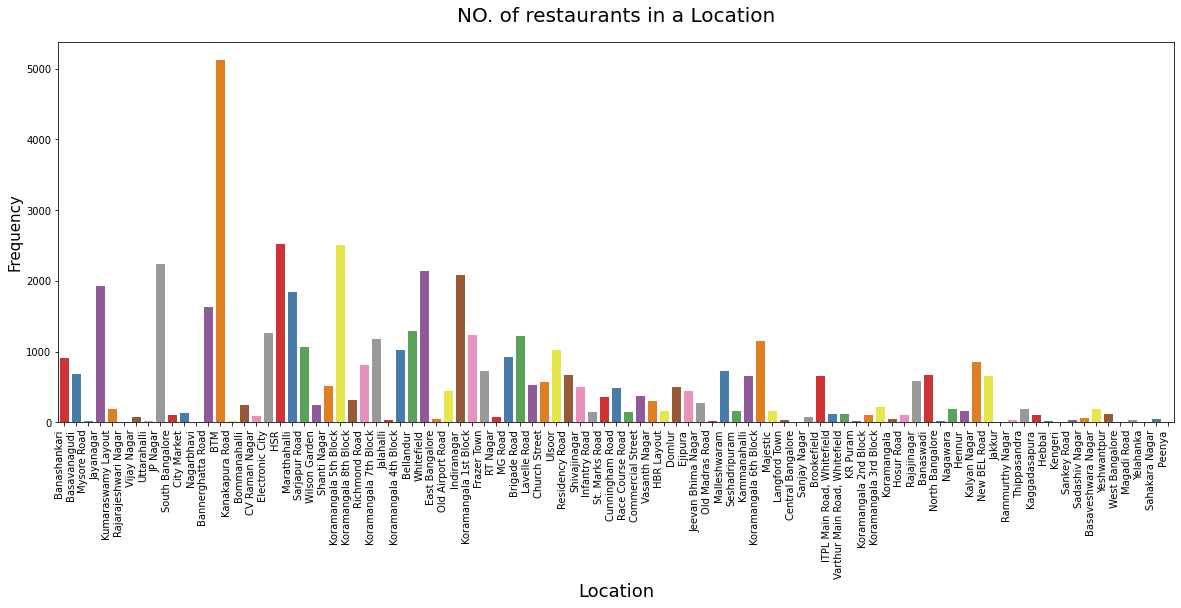

In [29]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

ii) Frequency of different types of restaurants

Text(0.5, 1.0, 'Restaurant types')

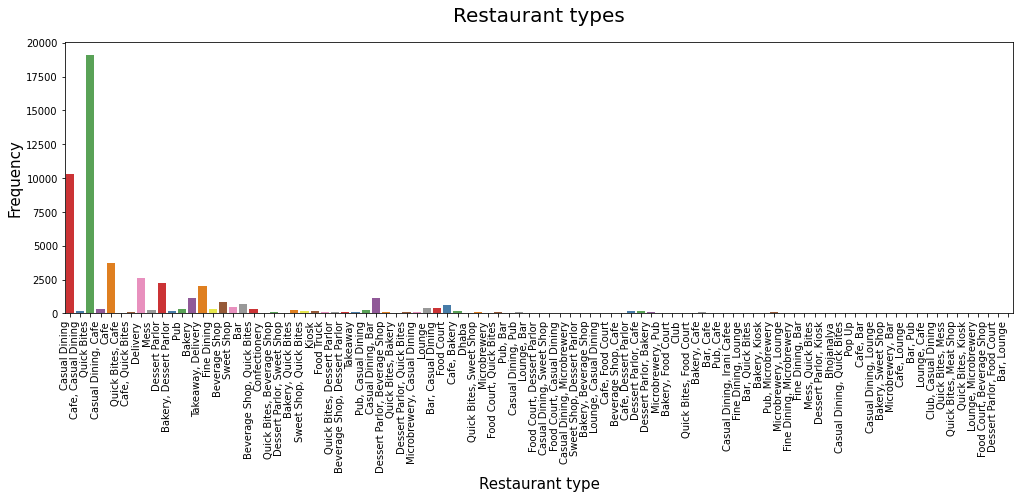

In [30]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

iii) Most famous restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

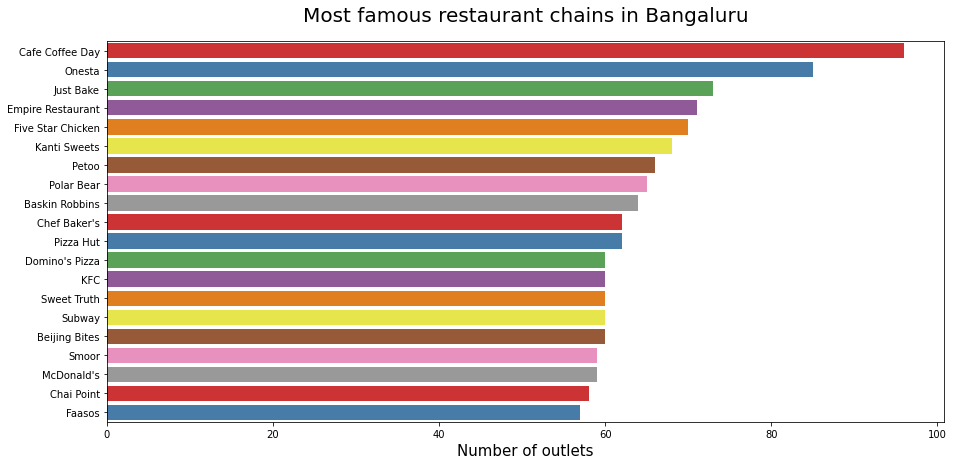

In [31]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Number of restaurtants that take online_order

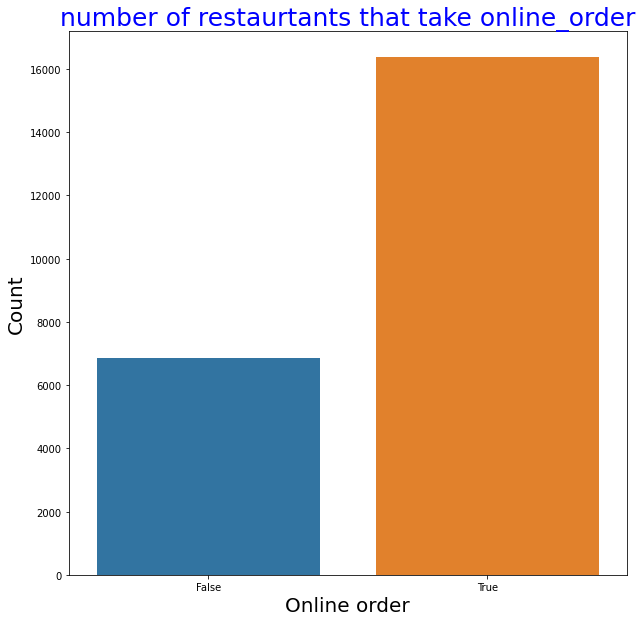

In [32]:
plt.figure(figsize=(10,10))

sns.countplot(zomato['online_order'])
plt.title("number of restaurtants that take online_order",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

Number of restaurants that have the option to book table

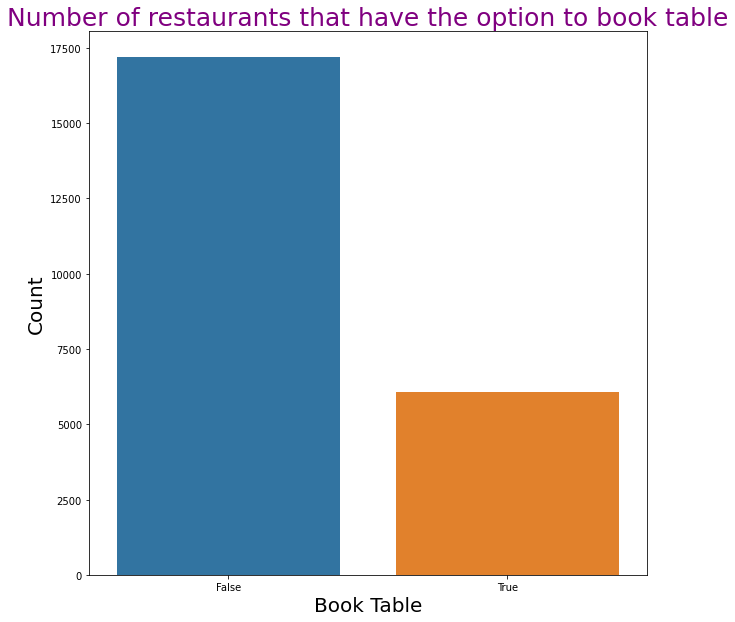

In [33]:
plt.figure(figsize=(10,10))

sns.countplot(zomato['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

In [34]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()

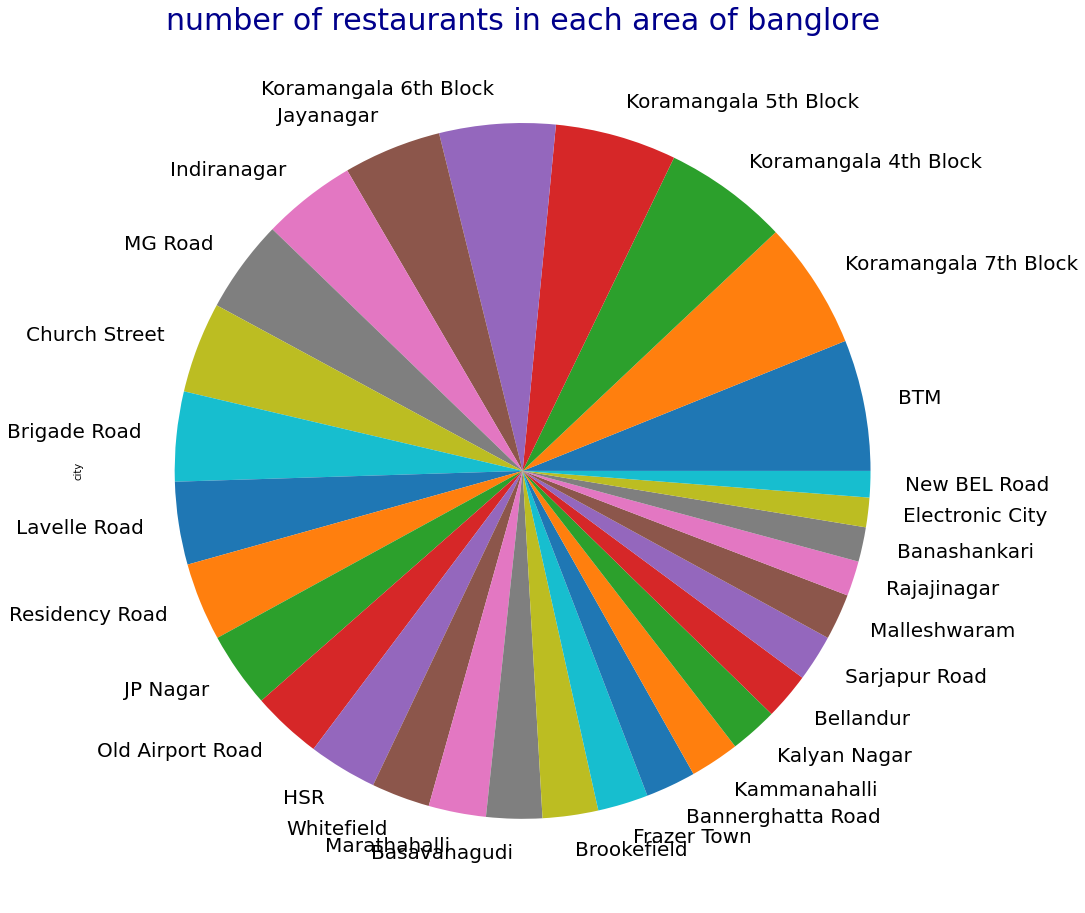

In [35]:
plt.figure(figsize=(16,16))

ax=zomato.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=30,color='darkblue')
plt.show()

Percentage of number of restaurants in each area of banglore

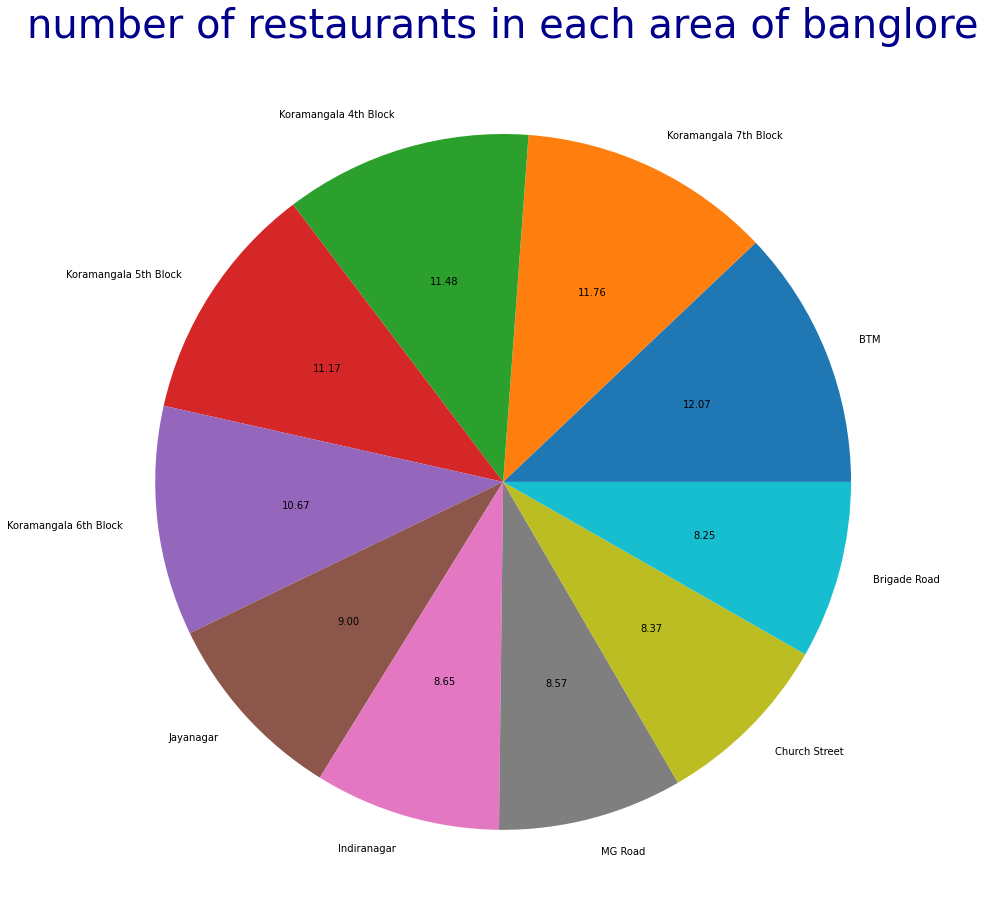

In [36]:
plt.figure(figsize=(16,16))

ax=zomato.city.value_counts()[:10]
labels=zomato['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

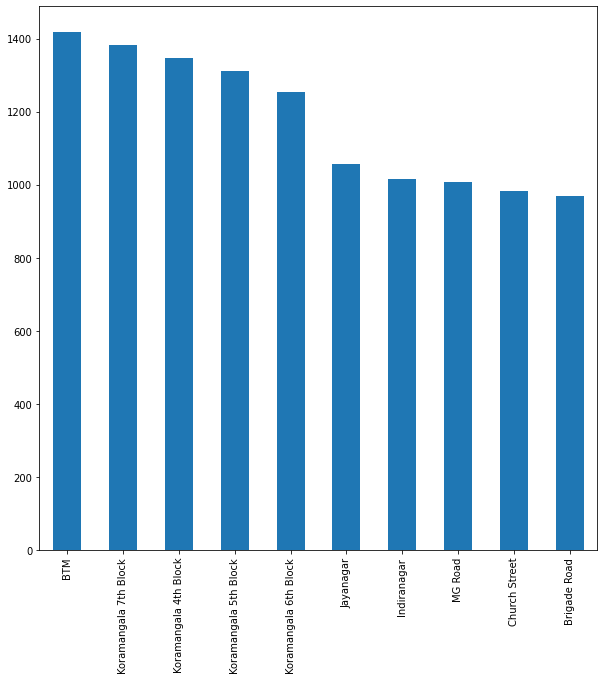

In [37]:
#TOP 10 location restaurants
plt.figure(figsize=(10,10))
ax=zomato.city.value_counts()[:10]
ax.plot(kind='bar')


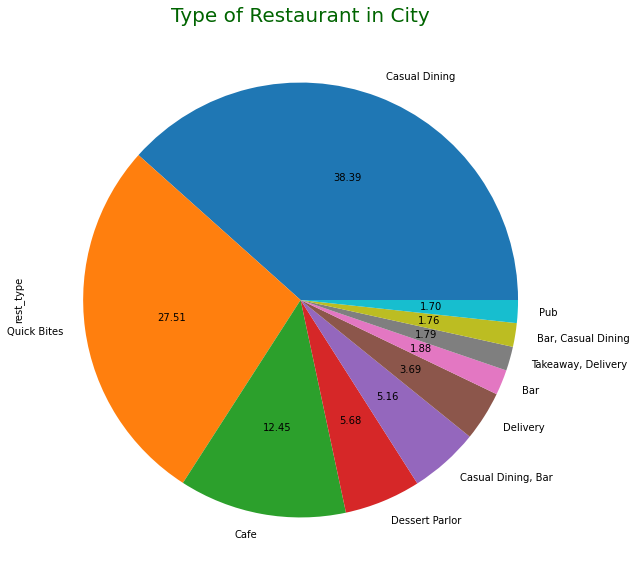

In [38]:

#4.5 Type of Restaurant in City
plt.figure(figsize=(10,10))

ax=zomato.rest_type.value_counts()[:10]
label=zomato['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

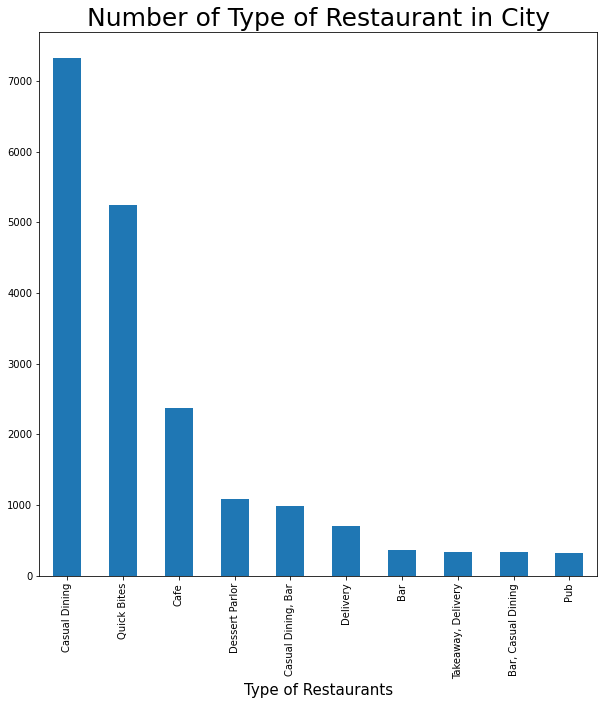

In [39]:
#4.6 Number of Type of Restaurant in City
plt.figure(figsize=(10,10))

ax=zomato.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

In [40]:
zomato=zomato.rename(columns={"cost" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})

In [41]:
zomato.dropna(subset=['rate','avg_cost','type'],inplace=True)

In [42]:
zomato['avg_cost']=zomato['avg_cost'].astype(int)
zomato.shape

(23248, 15)

Distribution of restaurants according to approx cost for two people

Text(0, 0.5, 'Percentage of restaurants')

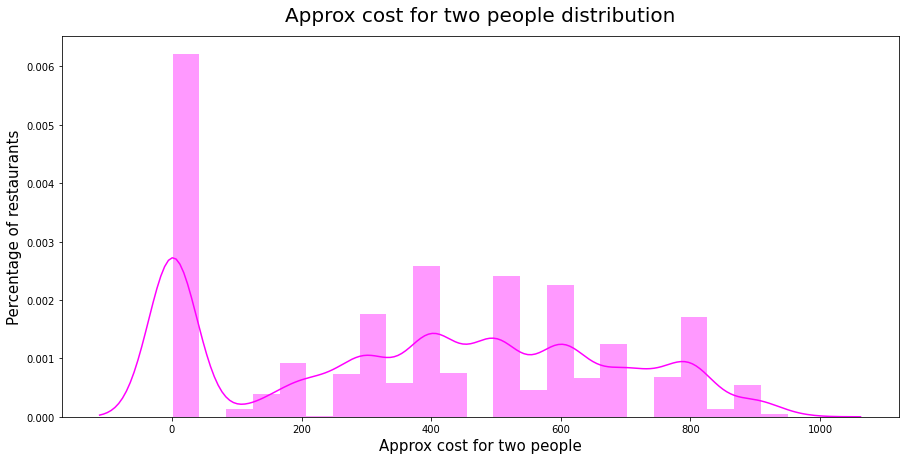

In [43]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(zomato_en['cost'],color="magenta")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

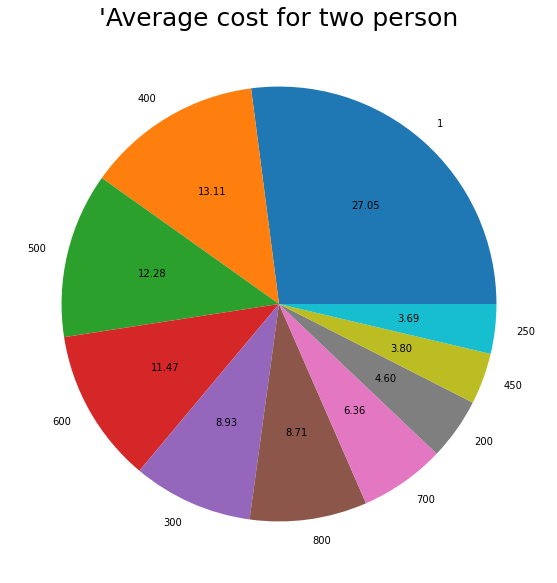

In [44]:

# Percentage of Average cost for two person
plt.figure(figsize=(10,10))

ax=zomato.avg_cost.value_counts()[:10]
label=zomato['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

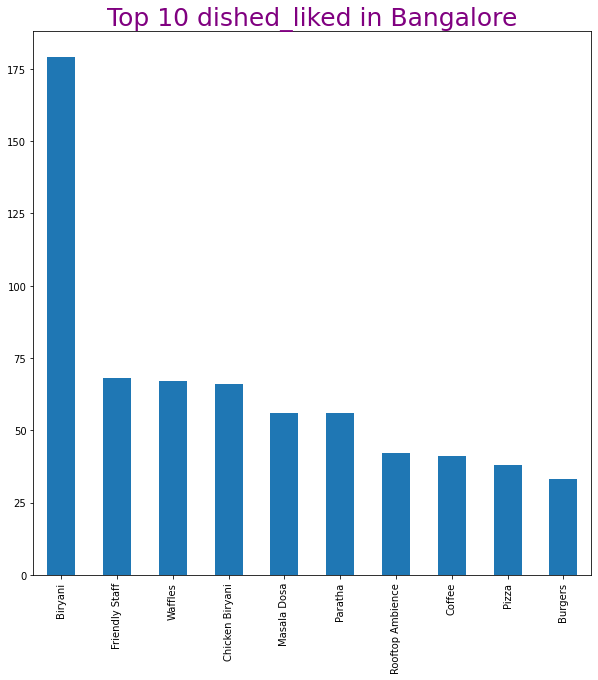

In [45]:
#4.8 Top 10 dished_liked in Bangalore
plt.figure(figsize=(10,10))
ax=zomato['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dished_liked in Bangalore",fontsize=25,color='purple')
plt.show()

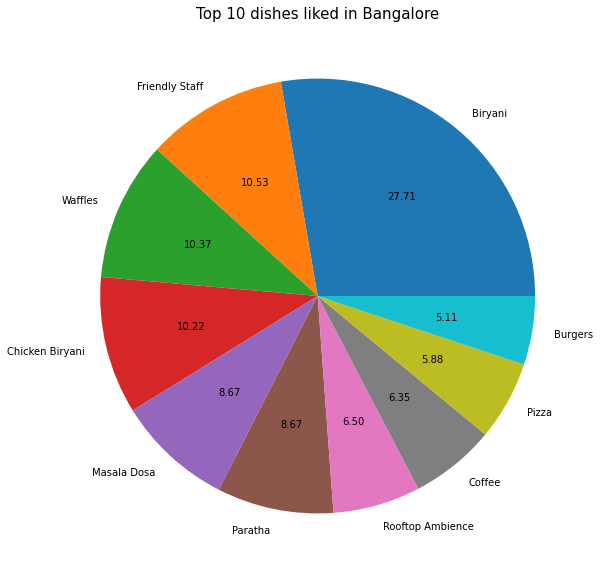

In [46]:
#Top 10 dished_liked in Bangalore
plt.figure(figsize=(10,10))
ax=zomato.dish_liked.value_counts()[:10]
label=zomato['dish_liked'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Top 10 dishes liked in Bangalore",fontsize=15)
plt.show()

Most popular cuisines of Bangalore

Text(0.5, 0, 'No. of restaurants')

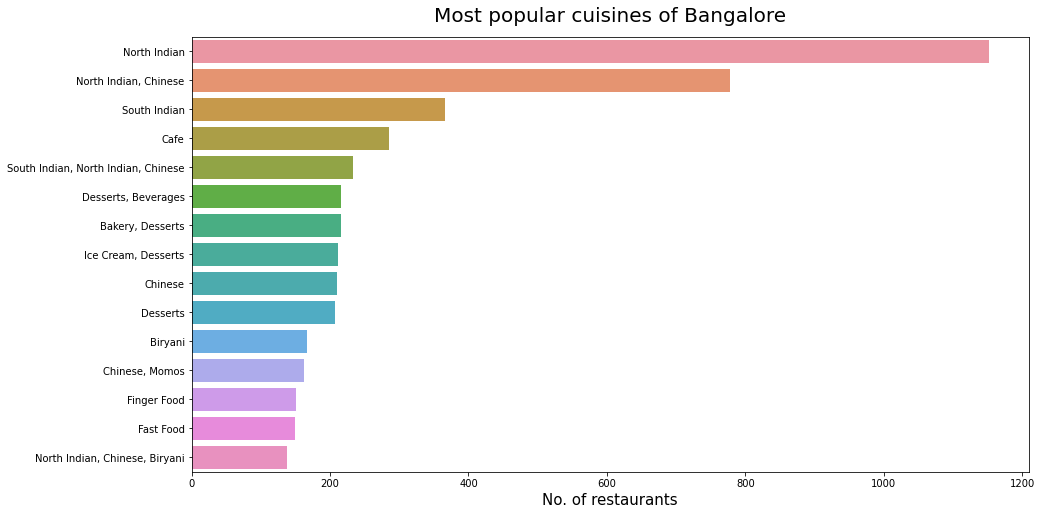

In [47]:
plt.figure(figsize=(15,8))
cuisines=zomato['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

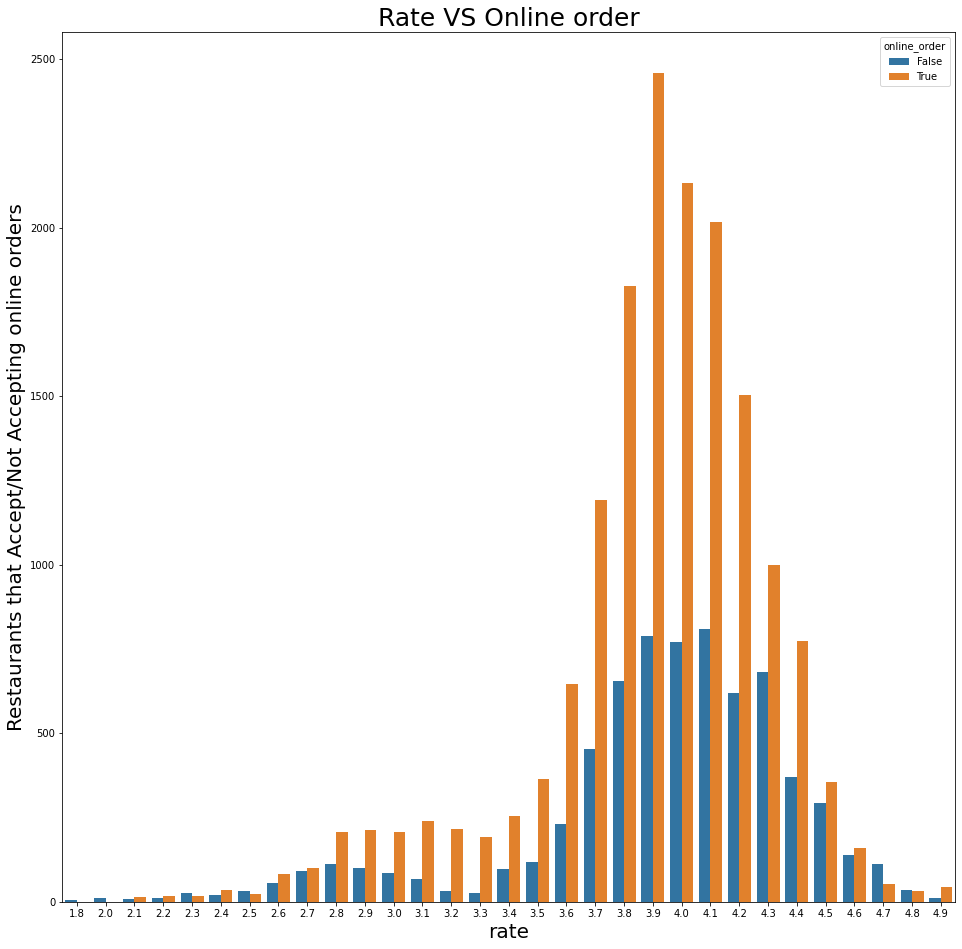

In [48]:

#Rate VS Online Order
plt.figure(figsize=(16,16))

sns.countplot(x=zomato['rate'],hue=zomato['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

Restaurant rating distribution

Text(0, 0.5, 'No. of restaurants')

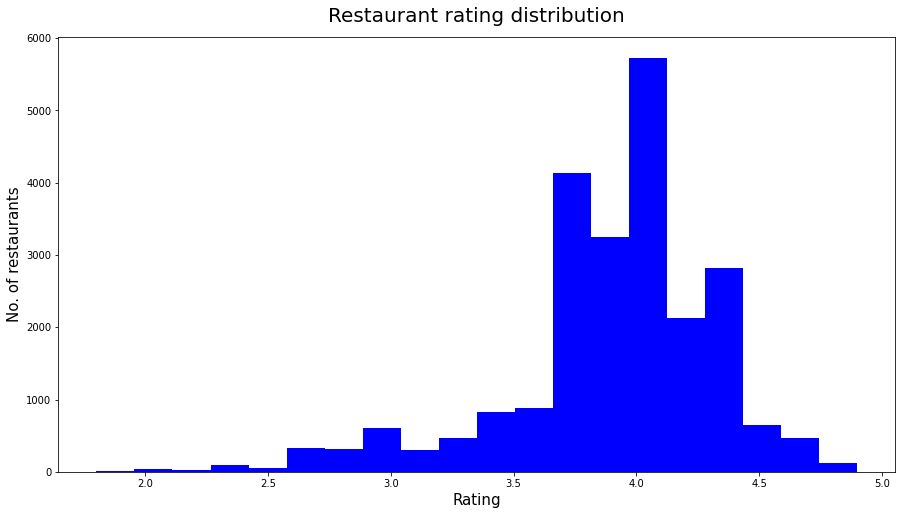

In [49]:
plt.figure(figsize=(15,8))
rating = zomato['rate']
plt.hist(rating,bins=20,color="blue")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)

Approx cost for 2 people distribution with density plot


Text(0, 0.5, 'Density')

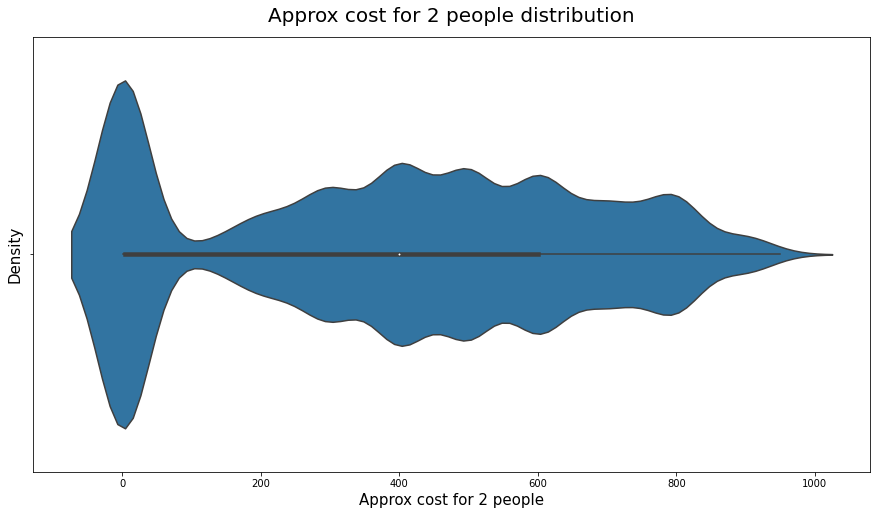

In [50]:
plt.figure(figsize=(15,8))
sns.violinplot(zomato.avg_cost)
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)

In [51]:
zomato.head()

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.800000


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

zomato.sample(3)

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,type,city,Mean Rating
12805,"1131, 17th Cross, 7th Sector, Near Vasan Eye C...",Reddy'S Restaurant,True,False,3.7,141,Casual Dining,"Chicken Biryani, Mutton Roganjosh, Andhra Meal","Andhra, Biryani, South Indian, Chinese",500,"[('Rated 3.0', ""RATED\n Don't have a picture ...",[],Dine-out,Koramangala 4th Block,3.45
18045,"5, 4th Floor, Above GIRIAS, 15th Cross, Malles...",1947,False,True,4.0,1070,Casual Dining,"Jal-jeera, Roti, Dhokla, Biryani, Kheer, Chaac...","North Indian, Chinese",950,"[('Rated 4.0', 'RATED\n Went here for a buffe...",[],Dine-out,Malleshwaram,3.87
15973,"5th Cross, 4th Main Road, Behind Ayyappa Templ...",Kapoor'S Biriyani,True,False,3.3,334,Quick Bites,"Raita, Hyderabadi Biryani","Biryani, North Indian",400,"[('Rated 1.0', 'RATED\n Total waste of money,...",[],Delivery,Koramangala 7th Block,2.94


In [53]:
zomato.head()

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.58


In [54]:
## Text Preprocessing

Some of the common text preprocessing / cleaning steps are:

 - Lower casing
 - Removal of Punctuations
 - Removal of Stopwords
 - Removal of URLs
 - Spelling correction

In [55]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
21428,"[('Rated 3.0', 'RATED\n They offer a variety ...","Tibetan, Momos"
16566,"[('Rated 4.0', 'RATED\n Have had normal chick...","Chinese, Momos, Nepalese, Tibetan"
12118,"[('Rated 5.0', 'RATED\n This place might look...","North Indian, Chinese, Kebab"
9287,"[('Rated 5.0', ""RATED\n From ages they have b...","Ice Cream, Desserts"
21817,"[('Rated 4.0', ""RATED\n A little on the exper...","Cafe, Continental, American, Burger"


In [56]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
11684,"[('rated 4.0', 'rated\n heaven for the people...","North Indian, Cafe, Fast Food, Beverages"
7877,"[('rated 3.0', 'rated\n been here for dinner ...","North Indian, South Indian, Chinese, Seafood"
875,"[('rated 5.0', 'rated\n this is a small, cute...","North Indian, Fast Food, Street Food"
124,"[('rated 3.0', 'rated\n food 3/5\nambience 3/...",North Indian
13362,"[('rated 4.0', 'rated\n amazing ambience. goo...","Cafe, Continental, Burger"


In [57]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
11474,rated 40 ratedn ordered chicken fried ricenã...,Chinese
11297,rated 30 ratedn good place to satisfy the swe...,"Mithai, Street Food"
2570,rated 40 ratedn huge place interiors are done...,"Continental, BBQ, Salad"
7549,rated 40 ratedn nice place located in sarjapu...,"North Indian, Street Food"
5162,rated 40 ratedn surprised to see an entire ea...,"Beverages, Cafe, Desserts, Spanish, Bakery"


In [58]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [59]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
5877,rated 30 ratedn located above starbucks on ch...,"Finger Food, Continental, Asian, North Indian"
21750,rated 30 ratedn biriyani was good but i have ...,"Biryani, North Indian, Chinese"
16378,rated 50 ratedn a cafe with a very unique con...,"Chinese, American, Continental, Italian, North..."
15496,rated 50 ratedn we had the yummiessst raspber...,Cafe
14576,rated 50 ratedn i havenãx83ãx83ãx82ãx83ã...,Desserts


In [60]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Chaatimes',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'Freshmenu',
 'Wamama',
 'Peppy Peppers',
 'Goa 0 Km',
 '1947',
 'Kabab Magic',
 'Gustoes Beer House',
 'The Biryani Cafe',
 'Rolls On Wheels',
 'Sri Guru Kottureshwara Davangere Benne Dosa',
 'Upahar Sagar',
 'Frozen Bottle',
 'Me

In [61]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

In [62]:
zomato['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

In [63]:
zomato.head()

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,rated 40 ratedn a beautiful place to dine int...,[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,rated 40 ratedn had been here for dinner with...,[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,rated 30 ratedn ambience is not that good eno...,[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,rated 40 ratedn great food and proper karnata...,[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,rated 40 ratedn very good restaurant in neigh...,[],Buffet,Banashankari,3.58


In [64]:
zomato.sample(5)

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,type,city,Mean Rating
418,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,True,False,4.0,126,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150,rated 40 ratedn if you can visit and eat then...,"['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,3.94
17968,"384/1, Bashyam Circle, Sadashiv Nagar, Bangalore",Mint Masala,True,False,3.8,571,Casual Dining,"Salads, Salad, Veg Platter, Lunch Buffet, Kada...","Chinese, North Indian",800,rated 40 ratedn been there for dinner with my...,[],Delivery,Malleshwaram,2.66
2147,"Ground Floor, 14, HM Geneva House, Cunningham ...",Kfc,True,False,3.6,206,Quick Bites,"Burgers, Crispy Chicken, Chicken Zinger Burger...","Burger, Fast Food",400,rated 50 ratedn kfc is always kfc delicious c...,"['Boneless Strips', '4 Pc Hot Wings', 'Chicken...",Delivery,Brigade Road,3.39
22372,"GMR Complex, Ground Floor, Opposite Bangalore ...",Mast Kalandar,False,False,2.1,338,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450,rated 20 ratedn food was kind of ok nothing ...,[],Delivery,Sarjapur Road,1.72
2229,"No 6, Wood Street (Off Brigade Road), Ashok Na...",Pabrai'S Fresh & Naturelle Icecreams,True,False,4.2,131,Dessert Parlor,"Apple Pie, Mascarpone Cheese, Nolen Gurer Ice ...","Ice Cream, Desserts",180,rated 50 ratedn it was a pleasant surprise wh...,"['Anjeer Ice Cream [Per Scoop]', 'Apple Pie Ic...",Delivery,Brigade Road,4.01


In [65]:
zomato.shape

(23248, 15)

In [66]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'avg_cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [67]:
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [68]:
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [69]:
df_percent.shape

(11624, 10)

### Term Frequency-Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of evaluating the significance of a word in a given document.

TF — Term frequency(tf) refers to how many times a given term appears in a document.

IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document.
The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear.
Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [70]:
df_percent.set_index('name', inplace=True)

In [71]:
indices = pd.Series(df_percent.index)

In [72]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [73]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [74]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'avg_cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'avg_cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'avg_cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [75]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df_percent[df_percent.index == 'Kargeens'].head()

,online_order,book_table,rate,dish_liked,cuisines,avg_cost,reviews_list,city,Mean Rating
name,,,,,,,,,
Kargeens,True,False,4.1,"Mocktails, Pasta Alfredo, Nachos, Veggie Pizza...","Cafe, Continental, Italian",600,rated 40 ratedn a very cool place for group o...,Koramangala 5th Block,3.9
Kargeens,True,False,4.1,"Mocktails, Pasta Alfredo, Nachos, Veggie Pizza...","Cafe, Continental, Italian",600,rated 40 ratedn a very cool place for group o...,Koramangala 6th Block,3.9
Kargeens,True,False,4.1,"Mocktails, Pasta Alfredo, Nachos, Veggie Pizza...","Cafe, Continental, Italian",600,rated 40 ratedn a very cool place for group o...,Koramangala 7th Block,3.9
Kargeens,True,False,3.9,"Chocolate Milkshake, Mocktails, Burgers, Nacho...","Cafe, Italian, Pizza, Continental",900,rated 30 ratedn at kargeens they serve variet...,New BEL Road,3.9
Kargeens,True,False,4.1,"Mocktails, Pasta Alfredo, Nachos, Veggie Pizza...","Cafe, Continental, Italian",600,rated 40 ratedn a very cool place for group o...,Koramangala 6th Block,3.9


In [76]:
recommend('Kargeens')

TOP 2 RESTAURANTS LIKE Kargeens WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,avg_cost
Cafe Aladdin,"Cafe, Chinese",3.71,500
Bamboo Heights,"Chinese, Fast Food, Continental",3.45,500


#### References
 - [Recommender Systems in Python 101](https://www.kaggle.com/gspmoreira/recommender-systems-in-python-101)
 - [How to build a Restaurant Recommendation Engine](https://medium.com/analytics-vidhya/how-to-build-a-restaurant-recommendation-engine-part-1-21aadb5dac6e)
 - [Getting started with Text Preprocessing](kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)

## End of the Notebook